# Advance Regression Case Study

US based Housing Company Surprise Housing wants to know below to enter Australian Market :
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

### Step 1 : Import and Explore data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
housing_raw = pd.read_csv("D://Learn//AssignmentAdvanceRegression//train.csv")

In [3]:
housing_raw.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
housing_raw.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
housing_raw.shape

(1460, 81)

Dataset has 1460 rows and 81 columns

In [7]:
len(housing_raw.index)

1460

In [8]:
round(housing_raw.isnull().sum()*100/len(housing_raw.index))

Id                 0.0
MSSubClass         0.0
MSZoning           0.0
LotFrontage       18.0
LotArea            0.0
Street             0.0
Alley             94.0
LotShape           0.0
LandContour        0.0
Utilities          0.0
LotConfig          0.0
LandSlope          0.0
Neighborhood       0.0
Condition1         0.0
Condition2         0.0
BldgType           0.0
HouseStyle         0.0
OverallQual        0.0
OverallCond        0.0
YearBuilt          0.0
YearRemodAdd       0.0
RoofStyle          0.0
RoofMatl           0.0
Exterior1st        0.0
Exterior2nd        0.0
MasVnrType         1.0
MasVnrArea         1.0
ExterQual          0.0
ExterCond          0.0
Foundation         0.0
BsmtQual           3.0
BsmtCond           3.0
BsmtExposure       3.0
BsmtFinType1       3.0
BsmtFinSF1         0.0
BsmtFinType2       3.0
BsmtFinSF2         0.0
BsmtUnfSF          0.0
TotalBsmtSF        0.0
Heating            0.0
HeatingQC          0.0
CentralAir         0.0
Electrical         0.0
1stFlrSF   

# Step 2 : Data Exploration

Creating Dataframe for numeric values

In [9]:
# all numeric (float and int) variables in the dataset
housing_numeric = housing_raw.select_dtypes(include=['float64', 'int64'])
housing_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [10]:
housing_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1452 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
F

## Dropping the columns we want to treat as categorical variables

In [11]:
housing_numeric = housing_numeric.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'MoSold', 'YrSold'], 1)
housing_numeric.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,3,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,4,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [12]:
df=housing_numeric

In [13]:
print('df Shape : ',df.shape)
print('housing_raw Shape : ',housing_raw.shape)


df Shape :  (1460, 21)
housing_raw Shape :  (1460, 81)


In [14]:
import matplotlib.pyplot as plt


<Figure size 1152x576 with 0 Axes>

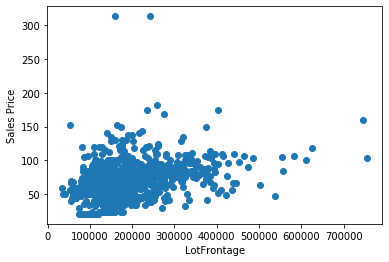

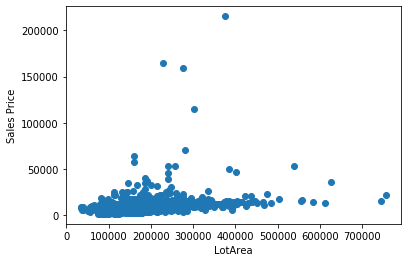

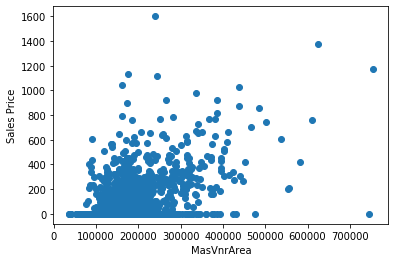

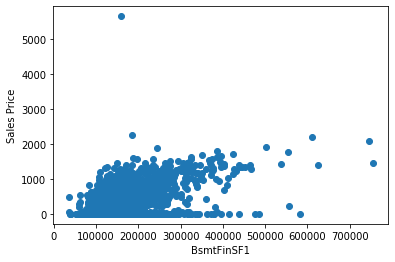

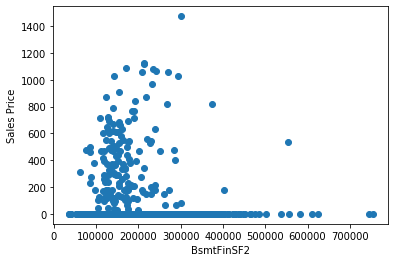

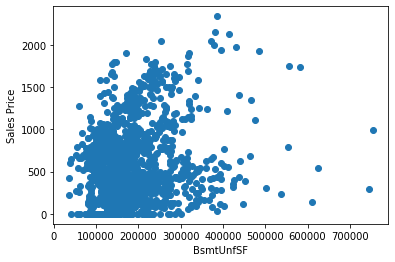

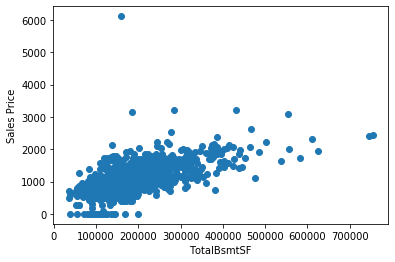

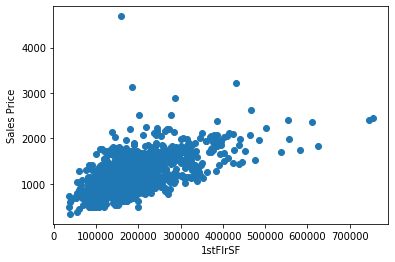

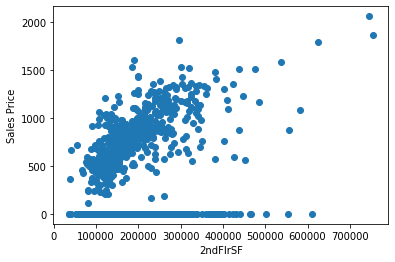

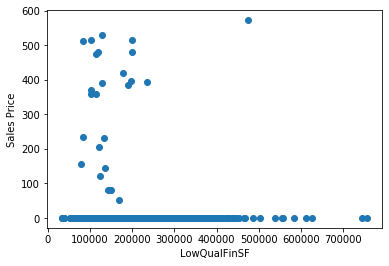

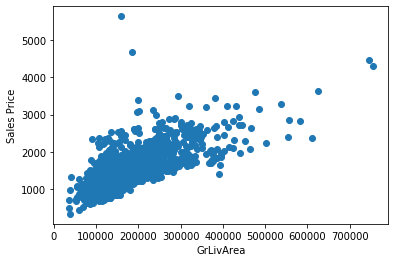

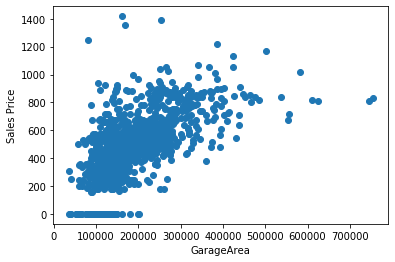

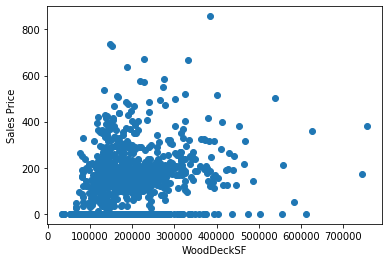

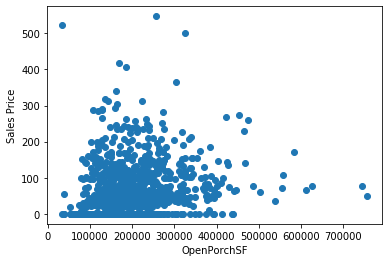

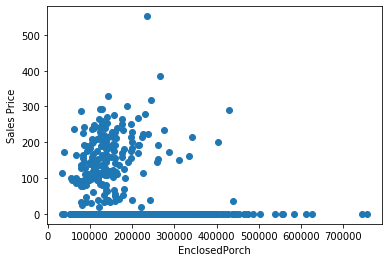

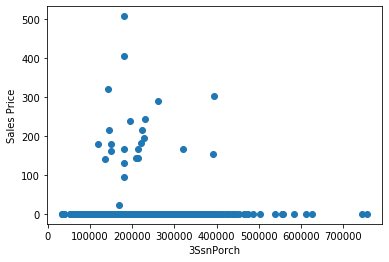

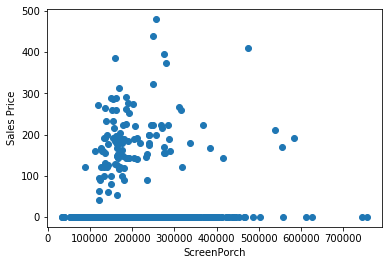

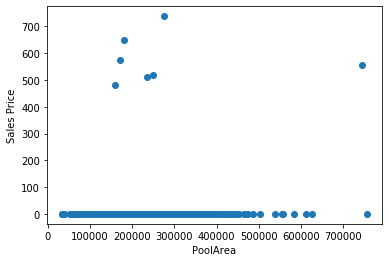

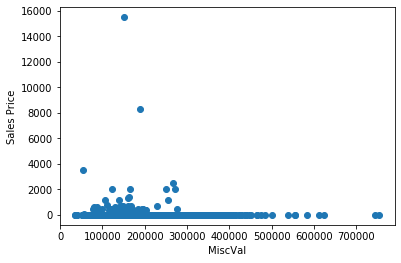

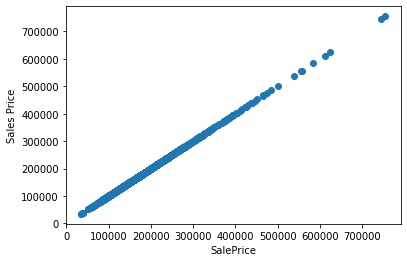

In [15]:
plt.figure(figsize=(16, 8))
plt.figure()


for col in range(1, df.shape[1]):
    plt.scatter(df["SalePrice"], df.iloc[:, col])
    plt.xlabel(df.columns[col])
    plt.ylabel("Sales Price")
    plt.show()

# Step 3 : Data Cleaning

## Outlier Treatment

**Replacing Outliers with 0.5 and .95 Quantile Values**

In [16]:
col=df.select_dtypes(include=['float64', 'int64']).columns

In [17]:
col

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')

### Checing the distribution of numeric values via box plot

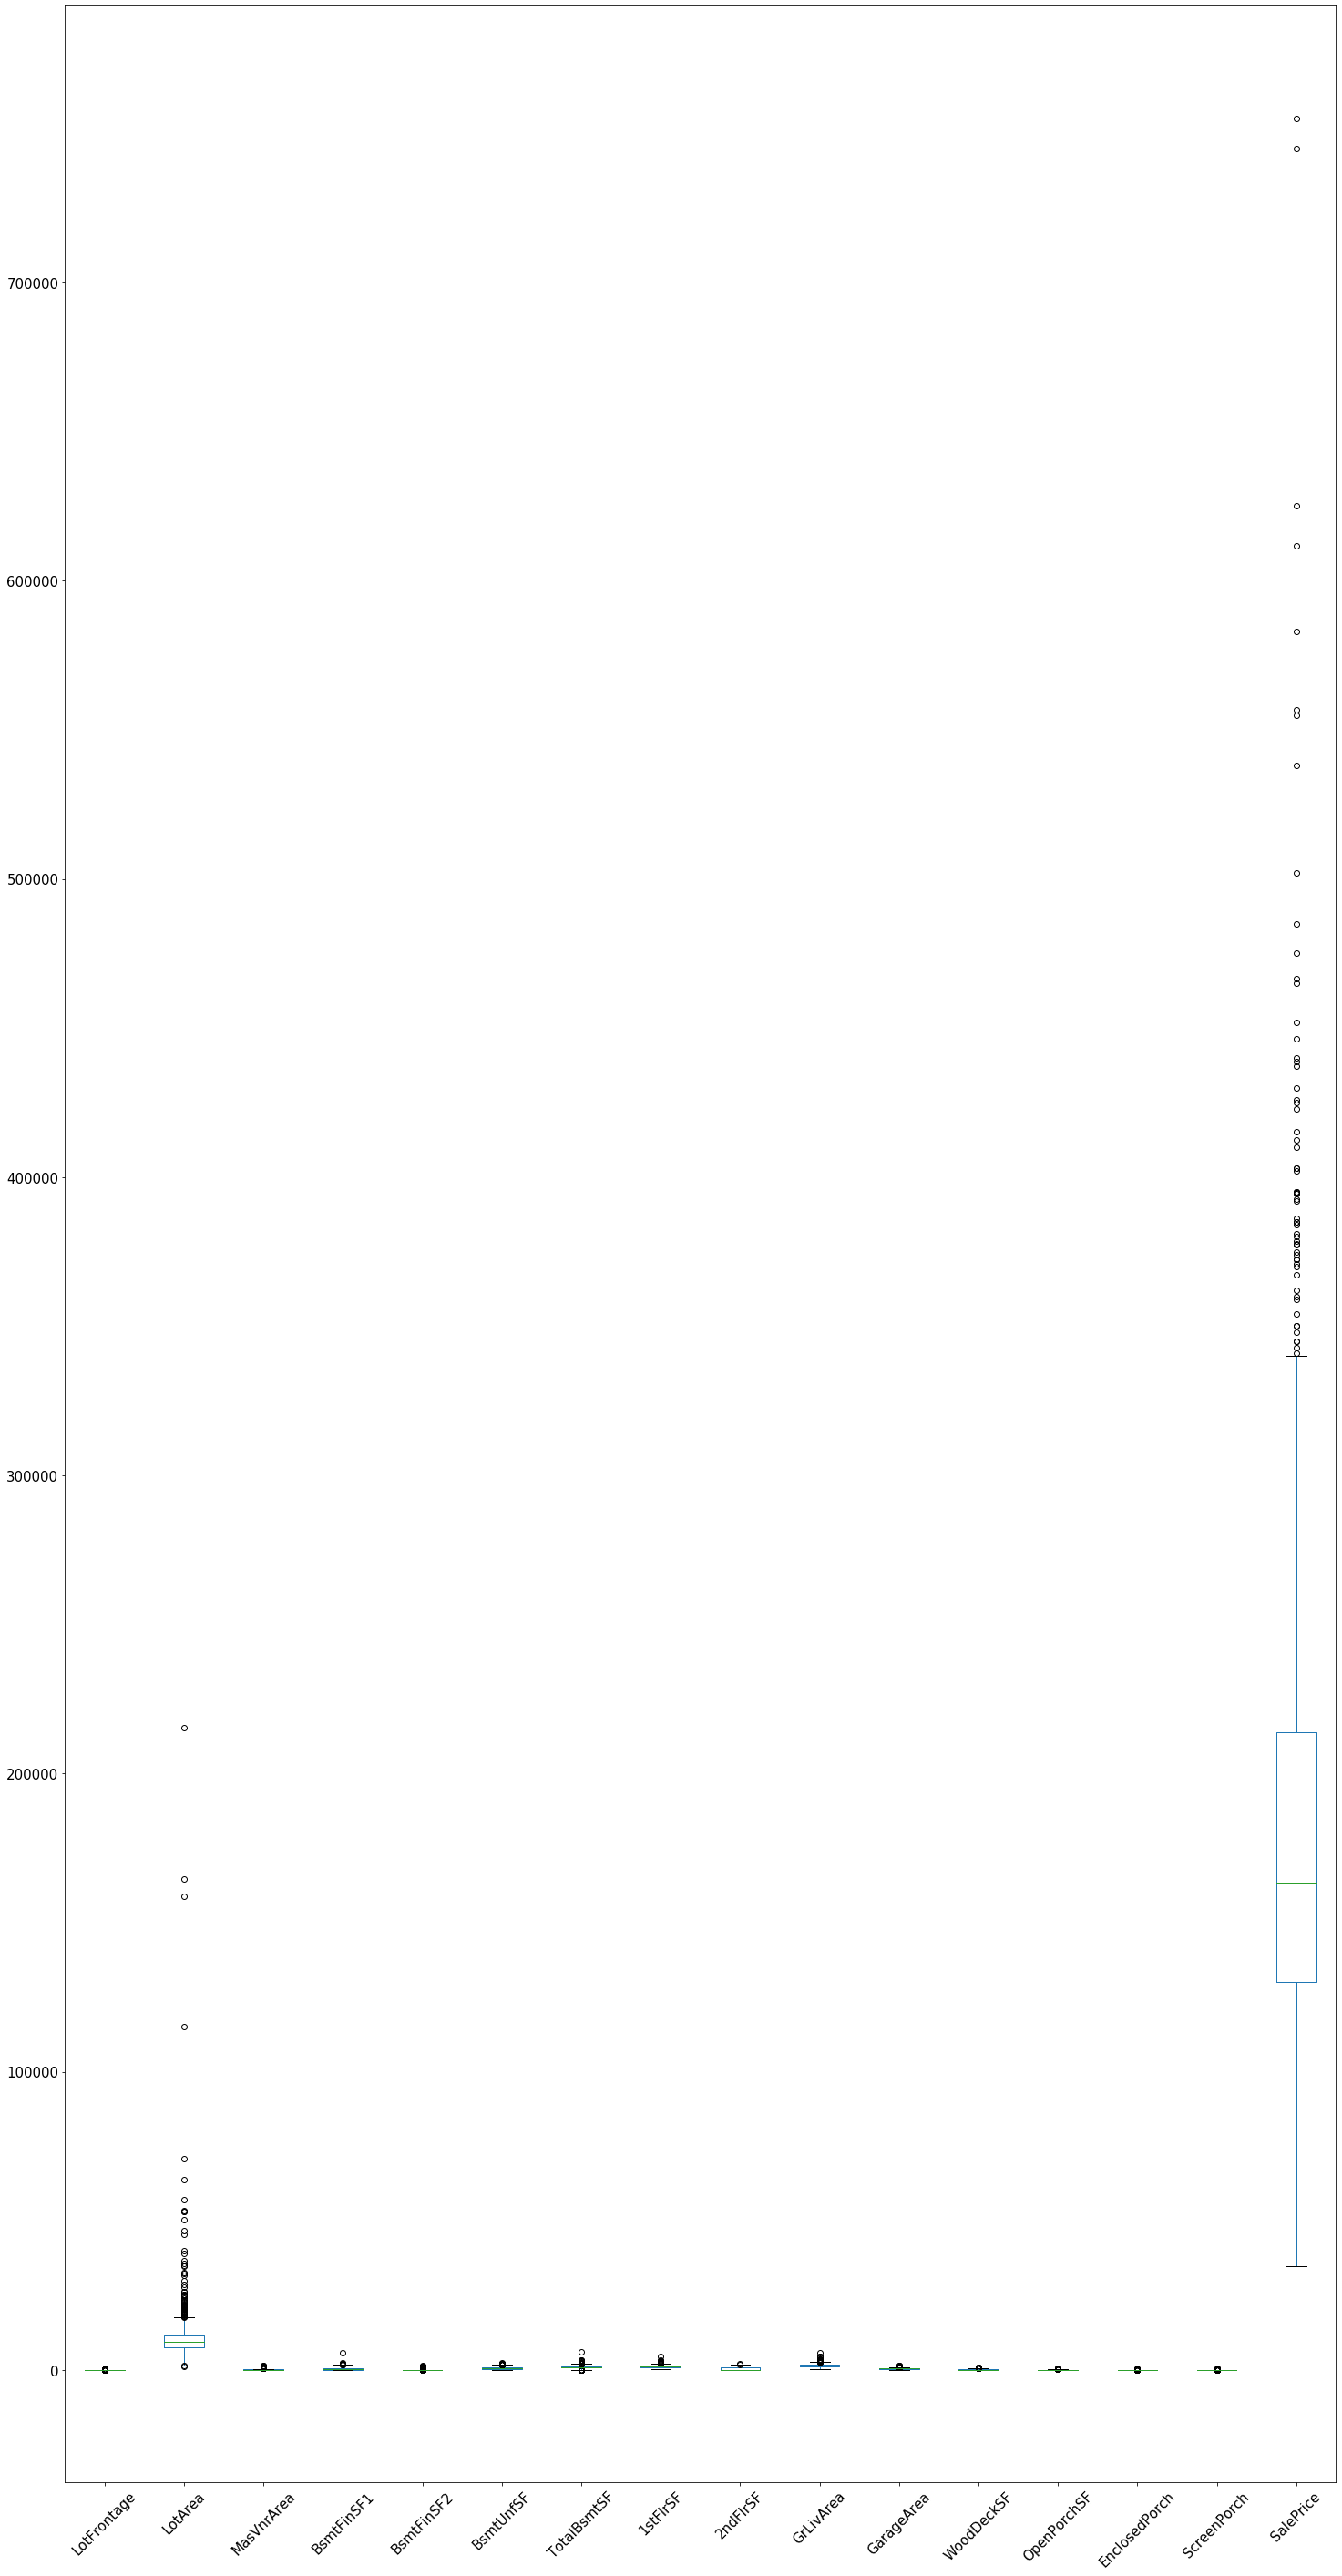

In [18]:
boxplot = df.boxplot(column=[ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch',  'ScreenPorch', 'SalePrice'],grid=False, rot=45, fontsize=15,figsize=(25, 50))

#'LowQualFinSF',

In [19]:
### Below Function will impute the outliers values

def imputeval(l):
    for a in l:
        maxv=round(df[a].quantile(.95),1)
        minv=round(df[a].quantile(.05),1)
        print(a , "  Max Val :  ",maxv , "  Min Val  ", minv)
        df[a][(df[a] >maxv)] =maxv
        df[a][(df[a] <minv)] =minv

In [20]:
imputeval([ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch',  'ScreenPorch', 'SalePrice'])

LotFrontage   Max Val :   107.0   Min Val   34.0
LotArea   Max Val :   17401.2   Min Val   3311.7
MasVnrArea   Max Val :   456.0   Min Val   0.0
BsmtFinSF1   Max Val :   1274.0   Min Val   0.0
BsmtFinSF2   Max Val :   396.2   Min Val   0.0
BsmtUnfSF   Max Val :   1468.0   Min Val   0.0
TotalBsmtSF   Max Val :   1753.0   Min Val   519.3
1stFlrSF   Max Val :   1831.2   Min Val   673.0
2ndFlrSF   Max Val :   1141.0   Min Val   0.0
GrLivArea   Max Val :   2466.1   Min Val   848.0
GarageArea   Max Val :   850.1   Min Val   0.0
WoodDeckSF   Max Val :   335.0   Min Val   0.0
OpenPorchSF   Max Val :   175.0   Min Val   0.0
EnclosedPorch   Max Val :   180.1   Min Val   0.0
ScreenPorch   Max Val :   160.0   Min Val   0.0
SalePrice   Max Val :   326100.0   Min Val   88000.0


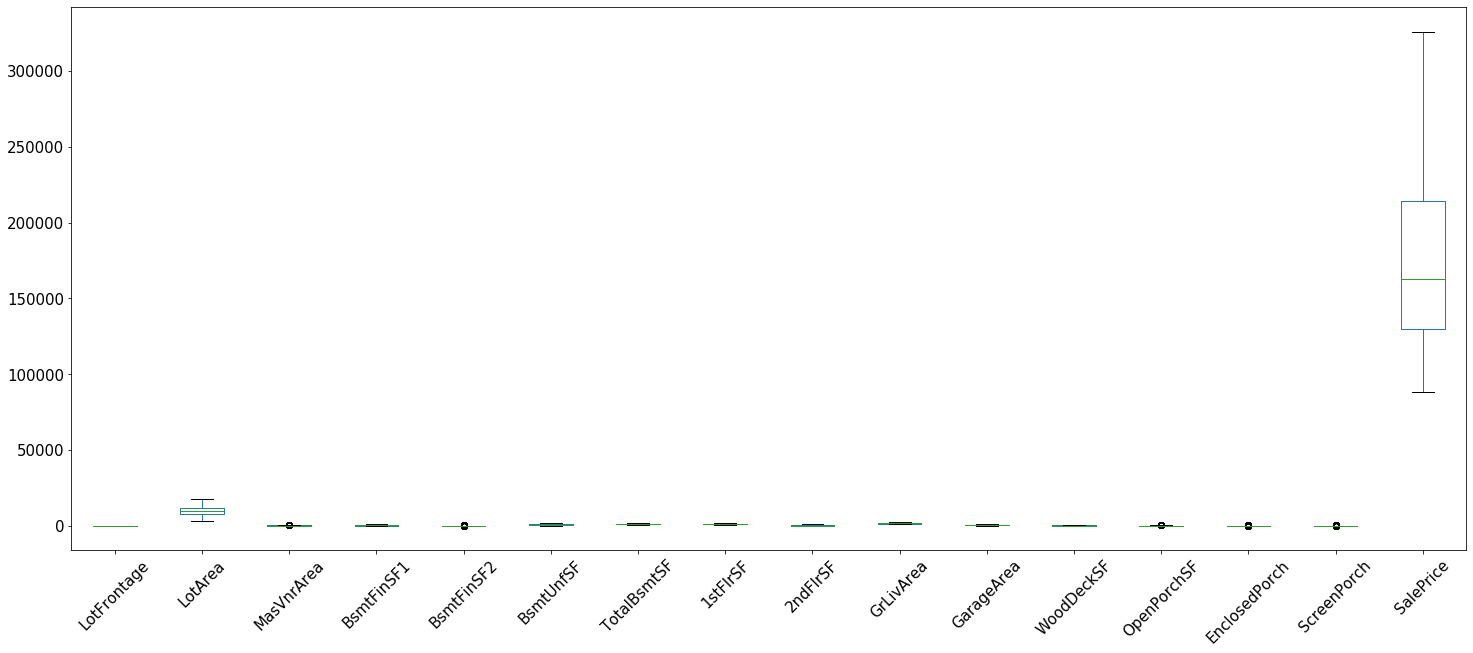

In [21]:
boxplot = df.boxplot(column=[ 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
        'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch',  'ScreenPorch', 'SalePrice'],grid=False, rot=45, fontsize=15,figsize=(25, 10))

#'LowQualFinSF',

### Checking Correlation between variables

In [22]:
# correlation matrix
cor = housing_numeric.corr()
cor

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
Id,1.000000,-0.032397,-0.005951,-0.044167,-0.011902,-0.000838,-0.007004,-0.029664,-0.000161,0.006692,-0.044230,0.001057,0.010719,-0.037229,-0.011126,0.002775,-0.046635,-0.001753,0.057044,-0.006242,-0.027520
LotFrontage,-0.032397,1.000000,0.652953,0.237374,0.150808,0.052561,0.153653,0.371211,0.411771,0.065385,0.021385,0.375392,0.365671,0.116064,0.163668,-0.035658,0.083437,0.055555,0.084339,0.008791,0.399572
LotArea,-0.005951,0.652953,1.000000,0.158122,0.205307,0.083392,0.075817,0.368174,0.438991,0.112991,0.016124,0.432400,0.342702,0.196201,0.159800,-0.031973,0.069079,0.090893,0.101763,0.056315,0.436540
MasVnrArea,-0.044167,0.237374,0.158122,1.000000,0.239314,-0.075587,0.098320,0.362533,0.344186,0.133831,-0.079283,0.365168,0.382251,0.166757,0.175062,-0.129677,0.033393,0.055920,0.000694,-0.031918,0.453584
BsmtFinSF1,-0.011902,0.150808,0.205307,0.239314,1.000000,-0.030366,-0.545201,0.439553,0.367902,-0.178651,-0.067707,0.112446,0.266497,0.207159,0.084261,-0.117357,0.029953,0.074475,0.051851,0.006059,0.364631
BsmtFinSF2,-0.000838,0.052561,0.083392,-0.075587,-0.030366,1.000000,-0.234424,0.070554,0.071516,-0.109252,0.018982,-0.037866,-0.021634,0.062910,-0.047417,0.040333,-0.032352,0.072302,0.069800,0.017801,-0.048816
BsmtUnfSF,-0.007004,0.153653,0.075817,0.098320,-0.545201,-0.234424,1.000000,0.398245,0.299075,0.011967,0.033126,0.241984,0.164140,-0.014408,0.144107,0.001725,0.025135,-0.021344,-0.035628,-0.023141,0.208671
TotalBsmtSF,-0.029664,0.371211,0.368174,0.362533,0.439553,0.070554,0.398245,1.000000,0.851291,-0.270962,-0.040412,0.391997,0.496649,0.242127,0.245122,-0.135828,0.050405,0.091866,0.039309,-0.011766,0.644111
1stFlrSF,-0.000161,0.411771,0.438991,0.344186,0.367902,0.071516,0.299075,0.851291,1.000000,-0.266200,-0.009554,0.503081,0.486288,0.237202,0.202723,-0.108281,0.060009,0.106180,0.067942,-0.017146,0.612286
2ndFlrSF,0.006692,0.065385,0.112991,0.133831,-0.178651,-0.109252,0.011967,-0.270962,-0.266200,1.000000,0.053306,0.675747,0.121977,0.074000,0.218116,0.041722,-0.023009,0.015286,0.056169,0.013707,0.296791


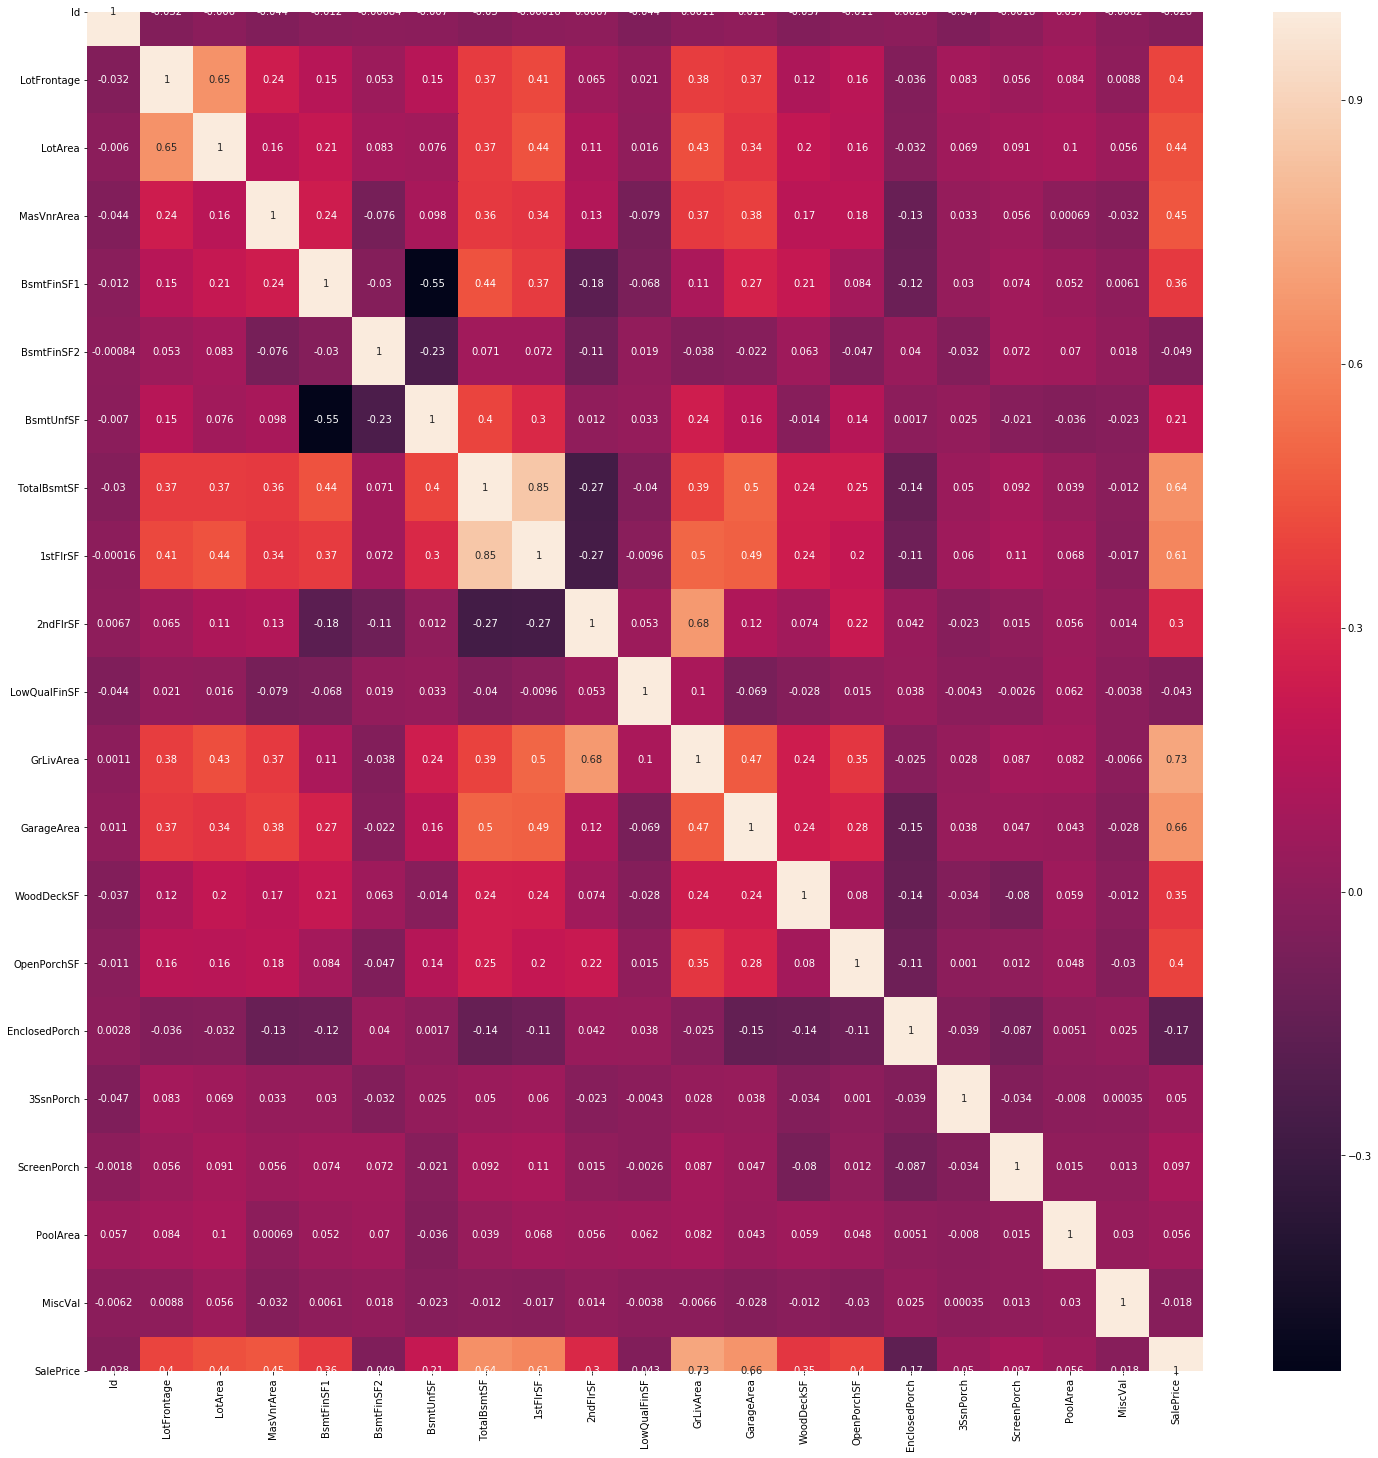

In [23]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,25))

# heatmap
sns.heatmap(cor,  annot=True)
plt.show()


# Checking the percentage of missing values


In [24]:
round(100*(housing_raw.isnull().sum()/len(housing_raw.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

# Null value treatment
Instead of dropping the null values which will result in a data loss, we will impute the null values according to the data dictionary provided with the data.

In [25]:
#NA in Alley column means No Alley, so we will replace NA by it.
housing_raw['Alley'].fillna('No Alley', inplace=True)

In [26]:
housing_raw['MasVnrType'].fillna('None', inplace=True) 

In [27]:
#NA in FireplaceQu column means No Fireplace, so we will replace NA by it.
housing_raw['FireplaceQu'].fillna('No Fireplace', inplace=True)

In [28]:
#NA in PoolQC column means No Pool, so we will replace NA by it.
housing_raw['PoolQC'].fillna('No Pool', inplace=True) 

In [29]:
#NA in Fence column means No Fence, so we will replace NA by it.
housing_raw['Fence'].fillna('No Fence', inplace=True) 

In [30]:
housing_raw['MasVnrArea'].fillna(0, inplace=True) 

In [31]:
housing_raw['LotFrontage'].fillna(0, inplace=True) 

In [32]:
#NA in GarageType, GarageFinish, GarageQual, GarageCond columns mean No Garage, so we will replace NA by it.

housing_raw['GarageType'].fillna('No Garage', inplace=True) 
housing_raw['GarageFinish'].fillna('No Garage', inplace=True) 
housing_raw['GarageQual'].fillna('No Garage', inplace=True) 
housing_raw['GarageCond'].fillna('No Garage', inplace=True) 

In [33]:
# MiscFeature column has almost 96% null values so we will drop it
housing_raw= housing_raw.drop('MiscFeature', axis=1)

In [34]:
housing_raw.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [35]:
#converting year to number of years
housing_raw['YearBuilt'] = 2020 - housing_raw['YearBuilt']
housing_raw['YearRemodAdd'] = 2020 - housing_raw['YearRemodAdd']
housing_raw['GarageYrBlt'] = 2020 - housing_raw['GarageYrBlt']
housing_raw['YrSold'] = 2020 - housing_raw['YrSold']

In [36]:
#converting from int type to object to treat the variables as categorical variables
housing_raw['MSSubClass'] = housing_raw['MSSubClass'].astype('object')
housing_raw['OverallQual'] = housing_raw['OverallQual'].astype('object')
housing_raw['OverallCond'] = housing_raw['OverallCond'].astype('object')
housing_raw['BsmtFullBath'] = housing_raw['BsmtFullBath'].astype('object')
housing_raw['BsmtHalfBath'] = housing_raw['BsmtHalfBath'].astype('object')
housing_raw['FullBath'] = housing_raw['FullBath'].astype('object')
housing_raw['HalfBath'] = housing_raw['HalfBath'].astype('object')
housing_raw['BedroomAbvGr'] = housing_raw['BedroomAbvGr'].astype('object')
housing_raw['KitchenAbvGr'] = housing_raw['KitchenAbvGr'].astype('object')
housing_raw['TotRmsAbvGrd'] = housing_raw['TotRmsAbvGrd'].astype('object')
housing_raw['Fireplaces'] = housing_raw['Fireplaces'].astype('object')
housing_raw['GarageCars'] = housing_raw['GarageCars'].astype('object')

In [37]:
#housing_raw =  housing_raw.dropna()

In [38]:
housing_raw.shape

(1460, 80)

In [39]:
final = housing_raw

####  Replacing 2 values variables to bit

In [40]:
final['Utilities']=final['Utilities'].map({'AllPub': 1, "NoSeWa": 0})
final['Street']=final['Street'].map({'Pave': 1, "Grvl": 0})
final['CentralAir']=final['CentralAir'].map({'Y': 1, "N": 0})

# 4. Data Preparation


In [41]:
final.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,1,No Alley,Reg,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,17,17,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,17.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,0,2,12,WD,Normal,208500
1,2,20,RL,80.0,9600,1,No Alley,Reg,Lvl,1,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,44,44,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,44.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,0,5,13,WD,Normal,181500
2,3,60,RL,68.0,11250,1,No Alley,IR1,Lvl,1,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,19,18,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,19.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,0,9,12,WD,Normal,223500
3,4,70,RL,60.0,9550,1,No Alley,IR1,Lvl,1,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,105,50,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,22.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,0,2,14,WD,Abnorml,140000
4,5,60,RL,84.0,14260,1,No Alley,IR1,Lvl,1,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,20,20,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,20.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,0,12,12,WD,Normal,250000


In [42]:
X = final.drop(['Id'],1)

In [43]:
catCollist=X.select_dtypes(include=['object'])
catCollist.head()

,MSSubClass,MSZoning,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,60,RL,No Alley,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
1,20,RL,No Alley,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
2,60,RL,No Alley,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No Pool,No Fence,WD,Normal
3,70,RL,No Alley,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No Pool,No Fence,WD,Abnorml
4,60,RL,No Alley,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No Pool,No Fence,WD,Normal


In [44]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
df_dummy1 = pd.get_dummies(catCollist, drop_first=True)

df_dummy1.head()
# Adding the results to the master dataframe
#df = pd.concat([df, df_dummy1], axis=1)

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_No Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_

#### Dropping the repeated variables

In [45]:
final  = final.drop(list(catCollist.columns), 1)

In [46]:
# concat dummy variables with X
final = pd.concat([final, df_dummy1], axis=1)

In [47]:
final.shape

(1460, 309)

#### Checking the distribution of sales price target variable

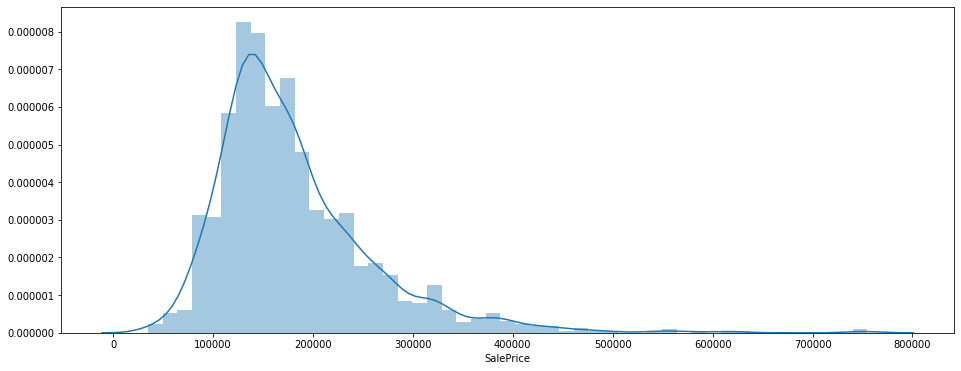

In [48]:
plt.figure(figsize=(16,6))
sns.distplot(final.SalePrice)
plt.show()

# Step 5: Test-Train Split

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [50]:
from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = final.drop(["SalePrice"], axis=1)
y=np.log(final["SalePrice"])

X = X.fillna(X.interpolate())

# scale
scaler = StandardScaler()
scaler.fit(X)

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 1)

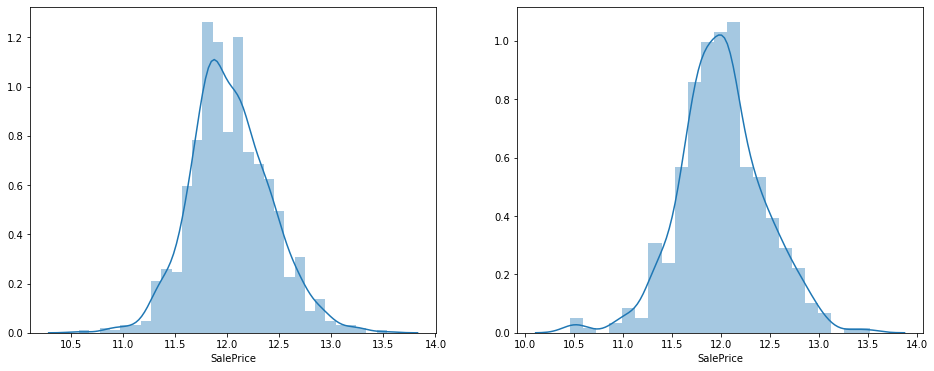

In [51]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.distplot(y_train)
plt.subplot(122)
sns.distplot(y_test)


# Step 6 : Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## 1.Ridge Regression

In [52]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [53]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.09231824618639993


In [54]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1000]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016399,0.001015,0.001801,0.000409,0.0001,{'alpha': 0.0001},-0.116489,-0.099614,-0.128097,-0.111050,-0.094982,-0.110043,0.011862,27,-0.048737,-0.053089,-0.049910,-0.055057,-0.055905,-0.052540,0.002805
1,0.013596,0.002062,0.002202,0.001170,0.001,{'alpha': 0.001},-0.116301,-0.099507,-0.127642,-0.110859,-0.094152,-0.109689,0.011932,26,-0.048760,-0.053167,-0.049955,-0.055137,-0.056049,-0.052614,0.002842
2,0.013800,0.001166,0.002000,0.000001,0.01,{'alpha': 0.01},-0.114762,-0.099036,-0.123841,-0.109728,-0.090504,-0.107573,0.011700,24,-0.048978,-0.053990,-0.050437,-0.055884,-0.057315,-0.053321,0.003167
3,0.010001,0.000002,0.001000,0.000003,0.05,{'alpha': 0.05},-0.111150,-0.099107,-0.116702,-0.109441,-0.089484,-0.105177,0.009688,23,-0.049855,-0.056767,-0.052810,-0.058032,-0.060178,-0.055528,0.003715
4,0.012000,0.002096,0.002001,0.000633,0.1,{'alpha': 0.1},-0.108710,-0.099004,-0.114071,-0.109541,-0.089508,-0.104166,0.008816,22,-0.050564,-0.058457,-0.054700,-0.059424,-0.061927,-0.057014,0.003975


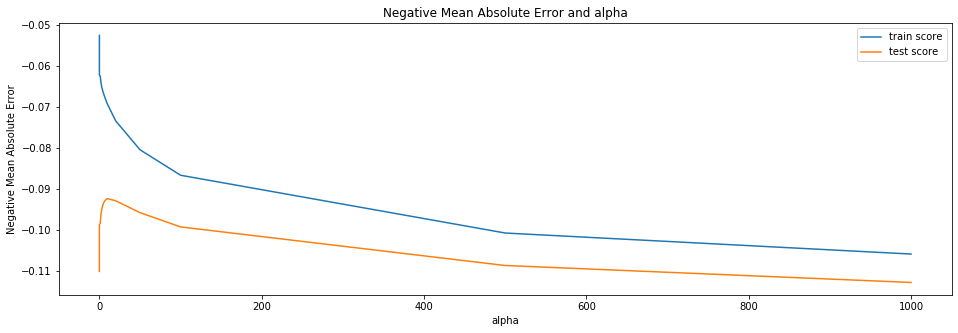

In [55]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [56]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# lasso model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
Ridge_Result_DF = pd.DataFrame(list(zip(cols, model_parameters)))
Ridge_Result_DF.columns= ['Features','Coef']

In [57]:
Ridge_Result_DF.sort_values(by=['Coef'],ascending=False).head(11)

,Features,Coef
0,constant,11.278
118,OverallQual_9,0.109
82,Neighborhood_StoneBr,0.108
76,Neighborhood_NridgHt,0.093
66,Neighborhood_Crawfor,0.092
117,OverallQual_8,0.078
257,Fireplaces_2,0.068
255,Functional_Typ,0.065
54,LandContour_Lvl,0.063
305,SaleCondition_Alloca,0.062


In [58]:
#R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print("r square for train data ridge :",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

y_test_pred = ridge.predict(X_test)
print("r square for test data ridge:" , metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

r square for train data ridge : 0.9259268967723759
r square for test data ridge: 0.8792698515283953


In [59]:
from sklearn.metrics import mean_squared_error
print ('RMSE for ridge is: \n', mean_squared_error(y_test, y_test_pred))


RMSE for ridge is: 
 0.022816729446588375


## 2. Lasso

In [60]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [61]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.247398,0.081778,0.001799,0.000748,0.0001,{'alpha': 0.0001},-0.103738,-0.092106,-0.121885,-0.100609,-0.083929,-0.100449,0.012741,2,-0.054240,-0.063853,-0.056710,-0.063333,-0.064797,-0.060587,0.004272
1,0.042404,0.005043,0.001998,0.000636,0.001,{'alpha': 0.001},-0.093530,-0.089716,-0.110704,-0.091840,-0.086536,-0.094460,0.008441,1,-0.069351,-0.078177,-0.074144,-0.078316,-0.079991,-0.075996,0.003839
2,0.010798,0.000400,0.001401,0.000490,0.01,{'alpha': 0.01},-0.121579,-0.122211,-0.130740,-0.104198,-0.111061,-0.117965,0.009282,3,-0.105244,-0.112933,-0.107910,-0.116119,-0.115543,-0.111550,0.004284
3,0.059400,0.010051,0.001403,0.000489,0.05,{'alpha': 0.05},-0.125345,-0.125495,-0.132455,-0.103599,-0.114948,-0.120379,0.010070,10,-0.107242,-0.116535,-0.112611,-0.122490,-0.118500,-0.115476,0.005205
4,0.058600,0.017410,0.001999,0.000631,0.1,{'alpha': 0.1},-0.125555,-0.125210,-0.131566,-0.103459,-0.114215,-0.120011,0.009981,9,-0.107575,-0.116567,-0.112735,-0.122256,-0.118443,-0.115515,0.005018


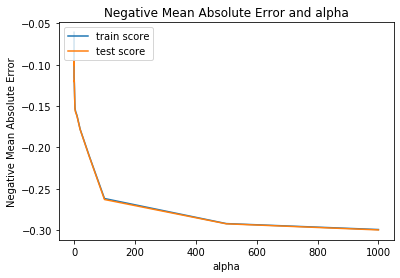

In [62]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [63]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.001}
-0.09445975501812633


In [64]:
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
# predict
y_train_pred = lasso.predict(X_train)
print("r square for train data lasso :",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print("r square for test data lasso:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

r square for train data lasso : 0.9058029600365285
r square for train data lasso: 0.8765720250269876


In [66]:
from sklearn.metrics import mean_squared_error
print ('RMSE of lasso is: ', mean_squared_error(y_test, y_test_pred))

RMSE of lasso is:  0.02332659030699254


In [67]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_Result_df=pd.DataFrame(list(zip(cols, model_parameters)))
lasso_Result_df.columns=['Feature','Coeffi']

In [68]:
lasso_Result_df.sort_values(by=['Coeffi'] , ascending=False).head(11)

,Feature,Coeffi
0,constant,11.330
118,OverallQual_9,0.150
66,Neighborhood_Crawfor,0.123
82,Neighborhood_StoneBr,0.111
76,Neighborhood_NridgHt,0.106
117,OverallQual_8,0.093
255,Functional_Typ,0.082
257,Fireplaces_2,0.080
142,Exterior1st_BrkFace,0.066
190,BsmtExposure_Gd,0.063


## Result

###### From the above analysis it is clear that :
- alpha for **Ridge** is 10 and **Lasso** is 0.001
- r2 score for **Ridge** is 92% and 87% for test and train values
- r2 score for **lasso** is 90% and 87% for test and train values respectively

#### Top 10 Features explaing the data set as per Ridge are :
- OverallQual_9
- Neighborhood_StoneBr
- Neighborhood_NridgHt
- Neighborhood_Crawfor
- OverallQual_8
- Fireplaces_2
- Functional_Typ
- LandContour_Lvl
- SaleCondition_Alloca



#### Top 10 Features explaining the data as per Lasso are :
- OverallQual_9
- Neighborhood_Crawfor
- Neighborhood_StoneBr
- Neighborhood_NridgHt
- OverallQual_8
- Functional_Typ
- Fireplaces_2
- Exterior1st_BrkFace
- BsmtExposure_Gd

